# Exercise 4: How many clusters of grain?

In the video, you learnt how to choose a good number of clusters for a dataset using the k-means inertia graph.  You are given a dataset of the measurements of samples of grain.  What's a good number of clusters in this case?

This dataset was obtained from the [UCI](https://archive.ics.uci.edu/ml/datasets/seeds).

From the course _Transition to Data Science_. [Buy the entire course for just $10](https://www.udemy.com/transition-to-data-science-in-python/?couponCode=CLUSTER-NBS) for many more exercises and helpful video lectures.

**Step 1:** Load the dataset _(written for you)_.

In [1]:
import pandas as pd

seeds_df = pd.read_csv('../datasets/seeds.csv')
# forget about the grain variety for the moment - we'll use this later
del seeds_df['grain_variety']
seeds_df

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


**Step 2:** Display the DataFrame to inspect the data.  Notice that there are 7 columns - so each grain sample (row) is a point in 7D space!  Scatter plots can't help us here.

In [3]:
seeds_df

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


**Step 3:** Extract the measurements from the DataFrame using its `.values` attribute:

In [2]:
seeds_df.values

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

**Step 4:**  _(Written for you)_. Measure the quality of clusterings with different numbers of clusters using the
inertia.  For each of the given values of `k`, perform the following steps:

  - Create a `KMeans` instance called `model` with `k` clusters.
  - Fit the model to the grain data `samples`.
  - Append the value of the `inertia_` attribute of `model` to the list `inertias`.

In [4]:
from sklearn.cluster import KMeans

In [6]:
model.inertia_

0.0068888199999999344

In [5]:
ans=[]
for i in range(seeds_df.shape[0]-1):
    model=KMeans(n_clusters=i+1).fit(seeds_df)
    ans.append(model.inertia_);
print(ans)##输出最后一行

[2719.852410177952, 1011.7123453151189, 587.3186115940427, 471.0033955251922, 385.5821219997565, 323.65342546496385, 280.2698829482978, 240.91377351777572, 217.2252683165108, 199.38493360497205, 183.50181950095342, 170.06093127896622, 159.89987424334458, 146.21867901923076, 138.07480394037623, 125.31244321948688, 117.12474102430826, 113.04971494712643, 107.89390058769312, 98.68248107329744, 96.81382109081284, 91.84949058022323, 85.10007354004257, 82.2912137748249, 77.86153519824592, 74.6838371296473, 71.41603684803266, 68.43705992833317, 64.70383176087813, 62.78680320495238, 61.60378934140443, 58.54029657440965, 56.51524876892531, 55.74520528590965, 52.19434597287393, 50.90967414936539, 50.891366915350645, 48.40707357715567, 48.015432403776046, 45.094649784369054, 44.46131182783426, 42.83932965496754, 41.438468492646834, 40.48306617362122, 39.28513601126191, 37.948607166727264, 36.52926081880951, 36.60417469839069, 34.02096986364539, 33.601288141333335, 33.99282986408442, 32.2068851090

**Step 5:**  Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

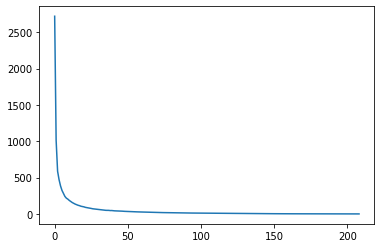

In [9]:
import matplotlib.pyplot as plt 
plt.plot(ans)

**Excellent work!** You can see from the graph that 3 is a good number of clusters, since these are points where the inertia begins to decrease more slowly.